<a href="https://colab.research.google.com/github/infinity-99/My-projects/blob/master/Image_classification_CS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This program classifiesimages

In [ ]:
# Import the libraries

import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Look at the data types of the variables

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Get the shape of the arays

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Take a look at the first image as an array

index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

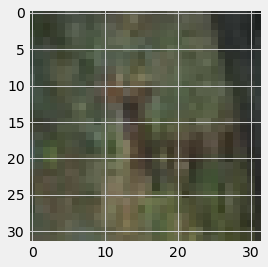

In [ ]:
# Show the image as a picture

img = plt.imshow(x_train[index])

In [ ]:
# Get the image label

print('The image label is:', y_train[index])

The image label is: [4]


In [ ]:
# Get the image classification

classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print the image class

print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [ ]:
# Convert the labels into a set of 10 numbers to input into the neural network

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# Print the new labels

print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# Print the new label of the image/picture above

print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Normalize the pixels to the values between 0 and 1

x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train[index]

In [ ]:
# Create the models architecture

model = Sequential()

# Add the first layer 

model.add( Conv2D(32, (5, 5), activation = 'relu', input_shape = (32,32,3)))

# Add a pooling layer

model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another convolution layer

model.add( Conv2D(32, (5, 5), activation = 'relu'))

# Add another pooling layer

model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a flattening layer

model.add(Flatten())

# Add a layer with 1000 neurons

model.add(Dense(1000, activation = 'relu'))

# Add a drop out layer

model.add(Dropout(0.5))

# Add a layer with 500 neurons

model.add(Dense(500, activation = 'relu'))

# Add a drop out layer

model.add(Dropout(0.5))

# Add a layer with 250 neurons

model.add(Dense(250, activation = 'relu'))

# Add a layer with 10 neurons

model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Compile the model

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
# Train the model

hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 56s 358ms/step - loss: 0.7071 - accuracy: 0.7499 - val_loss: 0.9128 - val_accuracy: 0.6897
Epoch 2/10
157/157 [==============================] - 59s 373ms/step - loss: 0.6609 - accuracy: 0.7659 - val_loss: 0.8913 - val_accuracy: 0.6968
Epoch 3/10
157/157 [==============================] - 55s 352ms/step - loss: 0.6213 - accuracy: 0.7804 - val_loss: 0.9242 - val_accuracy: 0.6914
Epoch 4/10
157/157 [==============================] - 55s 352ms/step - loss: 0.5898 - accuracy: 0.7910 - val_loss: 0.9397 - val_accuracy: 0.6925
Epoch 5/10
157/157 [==============================] - 55s 351ms/step - loss: 0.5513 - accuracy: 0.8046 - val_loss: 0.9144 - val_accuracy: 0.6991
Epoch 6/10
157/157 [==============================] - 55s 353ms/step - loss: 0.5141 - accuracy: 0.8188 - val_loss: 0.9811 - val_accuracy: 0.6919
Epoch 7/10
157/157 [==============================] - 55s 352ms/step - loss: 0.4867 - accuracy: 0.8285 - val_loss: 0.9512 - val_ac

In [ ]:
# Evaluate the model using the test data set

model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 0.9846 - accuracy: 0.6966


0.6966000199317932

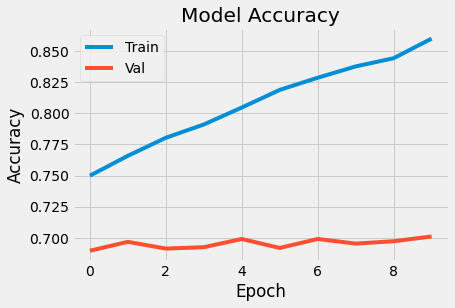

In [ ]:
# Visualize the models accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

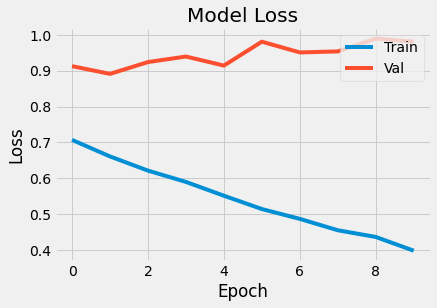

In [ ]:
# Visualize the models loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [ ]:
# Test the model with an example

from google.colab import files
uploaded = files.upload()

Saving Cat.jpg to Cat.jpg


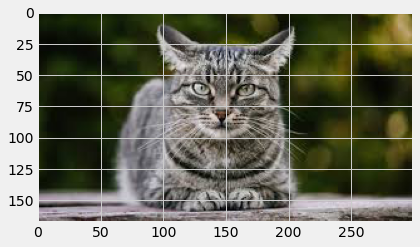

In [ ]:
# Show the image

new_image = plt.imread('Cat.jpg')
img = plt.imshow(new_image)

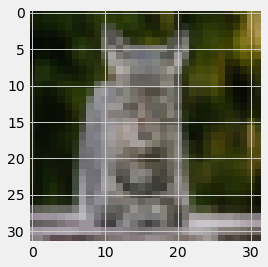

In [ ]:
# Resize the image

from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

In [ ]:
# Get the models predictions

prediction = model.predict(np.array([resized_image]))

# Show the predictions
prediction

array([[1.5967827e-04, 9.6431424e-05, 9.2551731e-02, 5.9740692e-01,
        4.4129513e-02, 1.9031738e-01, 6.6298479e-03, 6.7039251e-02,
        4.3262949e-04, 1.2366328e-03]], dtype=float32)

In [ ]:
# Sort the predictions from least to greatest

list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = prediction

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order

print(list_index)

[3, 5, 2, 7, 4, 6, 9, 8, 0, 1]


In [ ]:
# print the first 5 predictions

for i in range(5):
  print(classification[list_index[i]], ':', round(prediction[0][list_index[i]] * 100, 2), '%')

cat : 59.74 %
dog : 19.03 %
bird : 9.26 %
horse : 6.7 %
deer : 4.41 %
